<a href="https://colab.research.google.com/github/franklinperseuDS/TrabalhoModulo03/blob/main/Trabalho_Estat%C3%ADstica_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREPARAÇÃO DOS DADOS**

In [ ]:
# Pacotes necessários
import pandas as pd
import numpy as np
import statistics as st
import seaborn as se
import statsmodels.stats.proportion as smp
from scipy import stats
from scipy.stats import t
import scipy.stats
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dfConceito = pd.read_excel('/content/drive/Shared drives/Trabalho Estátistica/conceito_enade2016.xlsx')

## Tratamento do Dataframe 'Conceito' para as seguintes colunas
 1. codigo da IES 
 2. Sigla da IES 
 3. Organização Acadêmica 
 4. 'Município do Curso' 
 5. 'Sigla da UF' 
 6. Concluintes Inscritos 
 7. 'Concluintes Participantes 
 8. 'Nota Padronizada - FG' 
 9. 'Nota Padronizada - CE', 
 10. 'Conceito Enade (Contínuo)' 
 11. Conceito Enade (Faixa)
 12. Código da Área



In [ ]:
dfMedicina = dfConceito[dfConceito['Área de Enquadramento'] == 'MEDICINA'][['Código da Área','Código da IES','Sigla da IES','Município do Curso', 'Sigla da UF','Concluintes Inscritos', 'Concluintes Participantes','Nota Padronizada - FG','Nota Padronizada - CE','Conceito Enade (Contínuo)','Conceito Enade (Faixa)']]
dfMedicina['Conceito Enade (Faixa)'] = dfMedicina['Conceito Enade (Faixa)'].astype(int)
dfMedicina = dfMedicina.reset_index()

## Montando uma coluna de regiões
1 = Região Norte (NO)
norte = ['RO','AC','AM','RR' ,'PA' , 'AP' ,'TO']

2 = Região Nordeste (NE)
nordeste = ['MA','PI','CE','RN','PB','PE','AL','SE','BA']

3 = Região Sudeste (SE)
sudeste = ['MG','ES','RJ,'SP']

4 = Região Sul (SUL)
sul = ['PR','SC','RS']

5 = Região Centro-Oeste (CO)
CentroOeste = ['MS','MT','GO','DF']

In [ ]:
norte = ['RO','AC','AM','RR' ,'PA' , 'AP' ,'TO']
nordeste = ['MA','PI','CE','RN','PB','PE','AL','SE','BA']
sudeste = ['MG','ES','RJ','SP']
sul = ['PR','SC','RS']
centroOeste = ['MS','MT','GO','DF']

condicao = [np.isin(dfMedicina['Sigla da UF'], norte),
            np.isin(dfMedicina['Sigla da UF'], nordeste),
            np.isin(dfMedicina['Sigla da UF'], sudeste),
            np.isin(dfMedicina['Sigla da UF'], sul),
           np.isin(dfMedicina['Sigla da UF'],  centroOeste)]

resultados = ['Norte','Nordeste','Sudeste','Sul','Centro-Oeste']

dfMedicina['Regiao'] = np.select(condicao, resultados)
dfMedicina.head()

,index,Código da Área,Código da IES,Sigla da IES,Município do Curso,Sigla da UF,Concluintes Inscritos,Concluintes Participantes,Nota Padronizada - FG,Nota Padronizada - CE,Conceito Enade (Contínuo),Conceito Enade (Faixa),Regiao
0,2,12,1,UFMT,CUIABÁ,MT,35,33,3.473179,2.759319,2.937784,3,Centro-Oeste
1,8,12,2,UNB,BRASÍLIA,DF,89,85,3.436836,2.841475,2.990315,4,Centro-Oeste
2,13,12,3,UFS,ARACAJU,SE,53,53,2.643099,2.658829,2.654896,3,Nordeste
3,17,12,4,UFAM,MANAUS,AM,36,35,4.273778,2.299221,2.792860,3,Norte
4,21,12,5,UFPI,TERESINA,PI,45,45,3.533455,3.565352,3.557378,4,Nordeste


#ITEM A


##Concluintes


###Concluintes Inscritos

In [ ]:
se.boxplot(x = dfMedicina['Concluintes Inscritos']).set_title('Gráfico Box-plot do conceito ENADE Nota Padronizada - Concluintes Inscritos')


###Concluintes Participantes

In [ ]:
se.boxplot(x = dfMedicina['Concluintes Participantes']).set_title('Gráfico Box-plot do conceito ENADE Nota Padronizada - Concluintes Participantes')

##Notas


Text(0.5, 1.0, 'Gráfico Box-plot do conceito ENADE Nota Padronizada - Conhecimentos Específicos (CE)')

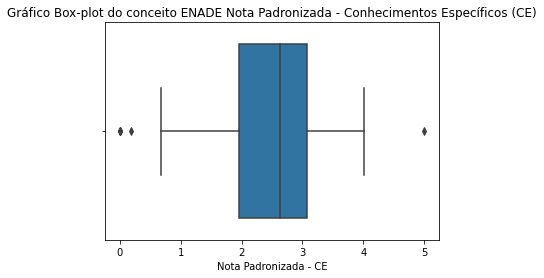

In [ ]:
se.boxplot(x = dfMedicina['Nota Padronizada - CE']).set_title('Gráfico Box-plot do conceito ENADE Nota Padronizada - Conhecimentos Específicos (CE)')

Text(0.5, 1.0, 'Gráfico Box-plot do conceito ENADE Nota Pardonizada - Fundamentos Gerais (FG)')

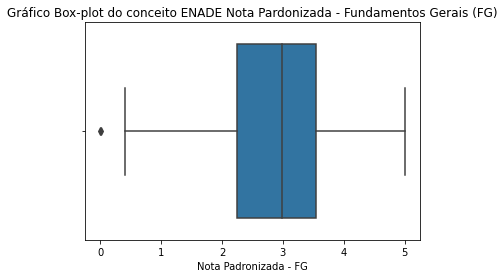

In [ ]:
se.boxplot(x = dfMedicina['Nota Padronizada - FG']).set_title('Gráfico Box-plot do conceito ENADE Nota Pardonizada - Fundamentos Gerais (FG)')

count    176.000000
mean       3.119318
std        0.850191
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Conceito Enade (Faixa), dtype: float64

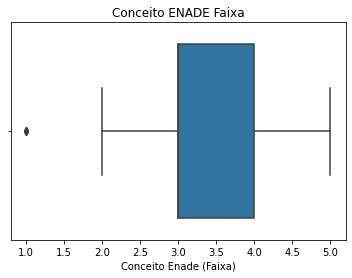

In [ ]:
#Conceito Enade (Faixa)
se.boxplot(x = dfMedicina['Conceito Enade (Faixa)']).set_title('Conceito ENADE Faixa')
dfMedicina['Conceito Enade (Faixa)'].describe()

Text(0.5, 1.0, 'Gráfico Box-plot do conceito ENADE contínuo de Medicina')

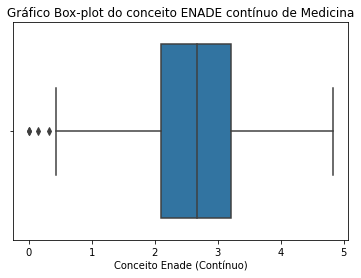

In [ ]:
se.boxplot(x = dfMedicina['Conceito Enade (Contínuo)']).set_title('Gráfico Box-plot do conceito ENADE contínuo de Medicina')

## Gráficos por Região



CO_REGIAO_CURSO
1. = Região Norte (NO)
2. = Região Nordeste (NE)
3. = Região Centro-Oeste (CO)
4. = Região Sul (SUL)
5. =  Região Sudeste (SE)

In [ ]:
dfMedicina['Regiao'].value_counts()

Sudeste         78
Nordeste        39
Sul             31
Norte           16
Centro-Oeste    12
Name: Regiao, dtype: int64

### Box Plot - Nota Padronizada FG


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Nota Padronizada - FG')

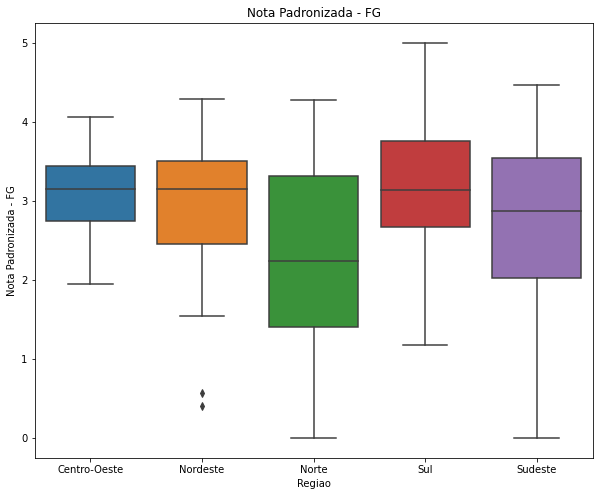

In [ ]:
plt.figure(figsize=(10,8))
se.boxplot(dfMedicina['Regiao'], dfMedicina['Nota Padronizada - FG']).set_title('Nota Padronizada - FG')

###Box Plot - Nota Padronizada - CE

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Nota Padronizada - CE')

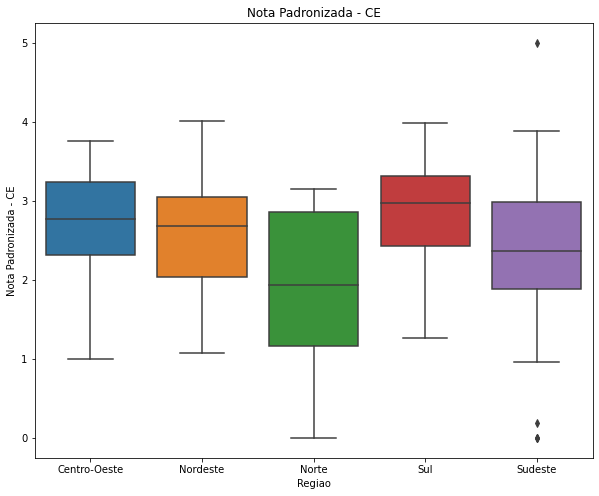

In [ ]:
NomeDaColuna = 'Nota Padronizada - CE'
plt.figure(figsize=(10,8))
se.boxplot(dfMedicina['Regiao'], dfMedicina[NomeDaColuna]).set_title(F'{NomeDaColuna}')

### **Box Plot - Conceito Enade (Faixa)**


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Conceito Enade (Faixa)')

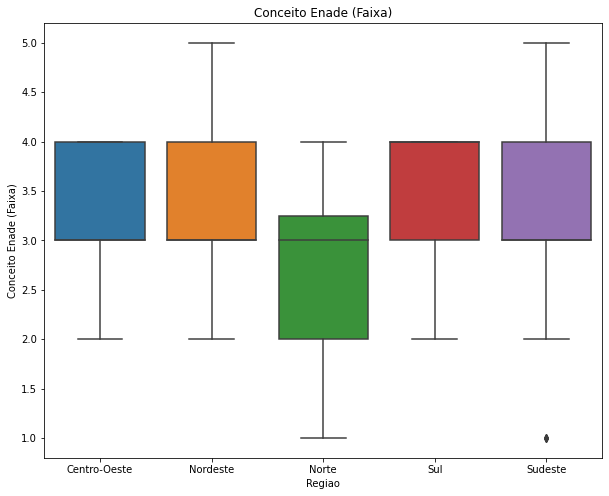

In [ ]:
NomeDaColuna = 'Conceito Enade (Faixa)'
plt.figure(figsize=(10,8))
se.boxplot(dfMedicina['Regiao'], dfMedicina[NomeDaColuna]).set_title(F'{NomeDaColuna}')

###Box Plot - Conceito Enade (Contínuo)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '{NomeDaColuna}')

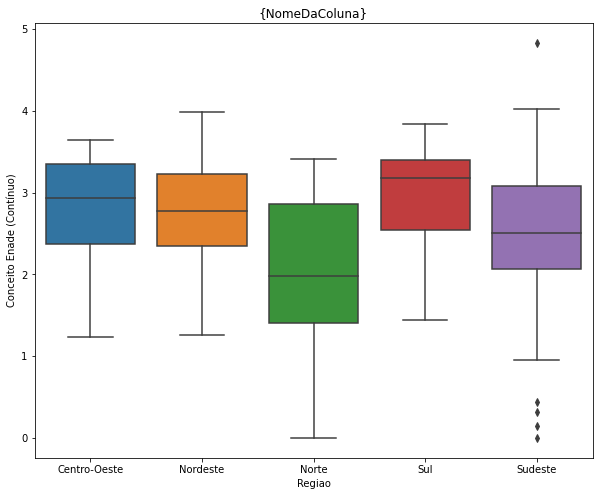

In [ ]:
NomeDaColuna = 'Conceito Enade (Contínuo)'
plt.figure(figsize=(10,8))
se.boxplot(dfMedicina['Regiao'], dfMedicina[NomeDaColuna]).set_title('{NomeDaColuna}')

# **ITEM B**


In [ ]:
# função para calcular moda
def myMode(item):
  try:
    return st.mode(item)
  except:
    return None

# função para calcular simetria
def calc_simetria(media, mediana):
  if (media > mediana):
    return 'ASSIMÉTRICA POSITIVA'
  elif (media < mediana):
    return 'ASSIMÉTRICA NEGATIVA'
  else:
    return 'SIMÉTRICA'

In [ ]:
# cria variáveis para as colunas quantitativas
conc_inscritos = dfMedicina['Concluintes Inscritos']
conc_participantes = dfMedicina['Concluintes Participantes']
nota_fg = dfMedicina['Nota Padronizada - FG']
nota_ce = dfMedicina['Nota Padronizada - CE']
conceito_cont = dfMedicina['Conceito Enade (Contínuo)']
conceito_faixa = dfMedicina['Conceito Enade (Faixa)']
colunas_nomes = ['Concluintes Inscritos', 'Concluintes Participantes', 'Nota Padronizada - FG', 'Nota Padronizada - CE', 'Conceito Enade (Contínuo)', 'Conceito Enade (Faixa)']
colunas = [conc_inscritos, conc_participantes, nota_fg, nota_ce, conceito_cont, conceito_faixa]

# calcula medidas de tendência central
medias = [st.mean(item) for item in colunas]
medianas = [st.median(item) for item in colunas]
modas = [myMode(item) for item in colunas]
desviopadrao = [st.stdev(item) for item in colunas]
covariacao = [st.variance(item) for item in colunas]

# cria dataframe para medidas de tendência central
valores = {'media': medias, 'mediana': medianas, 'moda': modas, 'desvio_padrao': desviopadrao, 'coef_variação': covariacao}
dfTendenciaCentral = pd.DataFrame(valores, index=colunas_nomes)
dfTendenciaCentral

,media,mediana,moda,desvio_padrao,coef_variação
Concluintes Inscritos,90.017045,84.000000,75.0,48.043370,2308.165422
Concluintes Participantes,88.244318,83.500000,75.0,47.072740,2215.842825
Nota Padronizada - FG,2.828452,2.977254,NaN,0.996981,0.993970
Nota Padronizada - CE,2.495717,2.626382,0.0,0.846080,0.715851
Conceito Enade (Contínuo),2.578901,2.677850,NaN,0.828536,0.686472
Conceito Enade (Faixa),3.119318,3.000000,3.0,0.850191,0.722825


# ITEM C

## Notas Gerais

### C- Concluintes Inscritos

In [ ]:
dfMedicina.head()

,index,Código da Área,Código da IES,Sigla da IES,Município do Curso,Sigla da UF,Concluintes Inscritos,Concluintes Participantes,Nota Padronizada - FG,Nota Padronizada - CE,Conceito Enade (Contínuo),Conceito Enade (Faixa),Regiao
0,2,12,1,UFMT,CUIABÁ,MT,35,33,3.473179,2.759319,2.937784,3,Centro-Oeste
1,8,12,2,UNB,BRASÍLIA,DF,89,85,3.436836,2.841475,2.990315,4,Centro-Oeste
2,13,12,3,UFS,ARACAJU,SE,53,53,2.643099,2.658829,2.654896,3,Nordeste
3,17,12,4,UFAM,MANAUS,AM,36,35,4.273778,2.299221,2.792860,3,Norte
4,21,12,5,UFPI,TERESINA,PI,45,45,3.533455,3.565352,3.557378,4,Nordeste


In [ ]:
media_ci = dfMedicina['Concluintes Inscritos'].mean()
dp_ci = dfMedicina['Concluintes Inscritos'].std()
CV_ci = dp_ci/media_ci
print('CV_ci = ',round(CV_ci,3))
 

CV_ci =  0.534


### C - Concluintes Participantes

In [ ]:
media_cp = dfMedicina['Concluintes Participantes'].mean()
dp_cp = dfMedicina['Concluintes Participantes'].std()
CV_cp = dp_cp/media_cp
print('CV_cp = ',round(CV_cp,3))

CV_cp =  0.533


### C - Variável Nota Padronizada - FG

In [ ]:
media_fg = dfMedicina['Nota Padronizada - FG'].mean()
dp_fg = dfMedicina['Nota Padronizada - FG'].std()
CV_fg = dp_fg/media_fg
print('CV_fg = ',round(CV_fg,3))


CV_fg =  0.352


In [ ]:
# Simetria
#se.boxplot(x = dfMedicinaC['Nota Padronizada - FG'], ).set_title('Gráfico Box-plot das Notas Padronizadas FG')

### C - Variável Nota Padronizada - CE

In [ ]:
media_ce = dfMedicina['Nota Padronizada - CE'].mean()
dp_ce = dfMedicina['Nota Padronizada - CE'].std()
CV_ce = dp_ce/media_ce
print('CV_ce = ',round(CV_ce,3))


CV_ce =  0.339


In [ ]:
#se.boxplot(x = dfMedicinaC['Nota Padronizada - CE'], ).set_title('Gráfico Box-plot das Notas Padronizadas CE')

### C - Variável Conceito Enade (Contínuo)

In [ ]:
media_CEC = dfMedicina['Conceito Enade (Contínuo)'].mean()
dp_CEC = dfMedicina['Conceito Enade (Contínuo)'].std()
CV_CEC = dp_CEC/media_CEC
print('CV_CEC = ',round(CV_CEC,3))


CV_CEC =  0.321


In [ ]:
#se.boxplot(x = dfMedicinaC['Conceito Enade (Contínuo)'], ).set_title('Gráfico Box-plot da Variável Conceito Enade (Contínuo)')

### C - Variável Conceito Enade (Faixa)




In [ ]:
media_CEF = dfMedicina['Conceito Enade (Faixa)'].mean()
dp_CEF = dfMedicina['Conceito Enade (Faixa)'].std()
CV_CEF = dp_CEF/media_CEF
print('CV_CEF = ',round(CV_CEF,3))


CV_CEF =  0.273


In [ ]:
#se.boxplot(x = dfMedicinaC['Conceito Enade (Faixa)'], ).set_title('Gráfico Box-plot da Variável Conceito Enade (Faixa)')

In [ ]:
# Quem é mais homogeneo
H = [CV_CEF,CV_CEC,CV_ce,CV_fg,CV_cp,CV_ci,]
print(min(H))

0.2725566660654716


### C- Verificar normalidade

In [ ]:
# funçao que verifica normalidade
# função para calcular simetria
def normalidade(h):
  h0 = stats.shapiro(h)
  if (h0[1] > 0.05):
    return 'normalizados'
  else:
    return 'não normalizados'

In [ ]:
print('Valores de conc_inscritos são ', normalidade(conc_inscritos))
print('Valores de conc_participantes são ', normalidade(conc_participantes))
print('Valores de nota_fg são ', normalidade(nota_fg))
print('Valores de nota_ce são ', normalidade(nota_ce))
print('Valores de conceito_cont são ', normalidade(conceito_cont))
print('Valores de conceito_faixa são ', normalidade(conceito_faixa))


Valores de conc_inscritos são  não normalizados
Valores de conc_participantes são  não normalizados
Valores de nota_fg são  não normalizados
Valores de nota_ce são  não normalizados
Valores de conceito_cont são  não normalizados
Valores de conceito_faixa são  não normalizados


## Por Regiões

In [ ]:
rNO = dfMedicina.loc[dfMedicina['Regiao'] == 'Norte']
rNE = dfMedicina.loc[dfMedicina['Regiao'] == 'Nordeste']
rSE = dfMedicina.loc[dfMedicina['Regiao'] == 'Sudeste']
rSU = dfMedicina.loc[dfMedicina['Regiao'] == 'Sul']
rCO = dfMedicina.loc[dfMedicina['Regiao'] == 'Centro-Oeste']

### C- Concluintes Inscritos

In [ ]:
df = dfMedicina.groupby(['Regiao']).agg(media_ci_R=('Concluintes Inscritos',np.mean),dp_ci_R=('Concluintes Inscritos',np.std))
df['CV_ci_R'] = df['dp_ci_R']/df['media_ci_R']
print(df)

              media_ci_R    dp_ci_R   CV_ci_R
Regiao                                       
Centro-Oeste   79.833333  24.902842  0.311935
Nordeste       86.256410  54.370424  0.630335
Norte          75.750000  43.523940  0.574573
Sudeste       101.653846  51.399335  0.505631
Sul            76.774194  32.599294  0.424613


In [ ]:
df[df['CV_ci_R']==min(df['CV_ci_R'])] 

,media_ci_R,dp_ci_R,CV_ci_R
Regiao,,,
Centro-Oeste,79.833333,24.902842,0.311935


### C - Concluintes Participantes

In [ ]:
df = dfMedicina.groupby(['Regiao']).agg(media_cp_R=('Concluintes Participantes',np.mean),dp_cp_R=('Concluintes Participantes',np.std))
df['CV_cp_R'] = df['dp_cp_R']/df['media_cp_R']
print(df)

              media_cp_R    dp_cp_R   CV_cp_R
Regiao                                       
Centro-Oeste   75.833333  24.609065  0.324515
Nordeste       83.384615  52.651593  0.631431
Norte          73.937500  41.803459  0.565389
Sudeste       100.333333  50.543967  0.503760
Sul            76.129032  32.067369  0.421224


In [ ]:
df[df['CV_cp_R']==min(df['CV_cp_R'])]

,media_cp_R,dp_cp_R,CV_cp_R
Regiao,,,
Centro-Oeste,75.833333,24.609065,0.324515


### C - Variável Nota Padronizada - FG

In [ ]:
df = dfMedicina.groupby(['Regiao']).agg(media_fg_R=('Nota Padronizada - FG',np.mean),dp_fg_R=('Nota Padronizada - FG',np.std))
df['CV_fg_R'] = df['dp_fg_R']/df['media_fg_R']
print(df)

              media_fg_R   dp_fg_R   CV_fg_R
Regiao                                      
Centro-Oeste    3.040652  0.625663  0.205766
Nordeste        2.896809  0.946093  0.326598
Norte           2.356935  1.271595  0.539512
Sudeste         2.711669  1.023436  0.377419
Sul             3.197517  0.839710  0.262613


In [ ]:
df[df['CV_fg_R']==min(df['CV_fg_R'])]

,media_fg_R,dp_fg_R,CV_fg_R
Regiao,,,
Centro-Oeste,3.040652,0.625663,0.205766


### C - Variável Nota Padronizada - CE

In [ ]:
df = dfMedicina.groupby(['Regiao']).agg(media_ce_R=('Nota Padronizada - CE',np.mean),dp_ce_R=('Nota Padronizada - CE',np.std))
df['CV_ce_R'] = df['dp_ce_R']/df['media_ce_R']
print(df)

              media_ce_R   dp_ce_R   CV_ce_R
Regiao                                      
Centro-Oeste    2.676164  0.828531  0.309597
Nordeste        2.615184  0.705564  0.269795
Norte           1.958728  0.998773  0.509909
Sudeste         2.379903  0.893009  0.375229
Sul             2.844126  0.634229  0.222996


In [ ]:
df[df['CV_ce_R']==min(df['CV_ce_R'])]

,media_ce_R,dp_ce_R,CV_ce_R
Regiao,,,
Sul,2.844126,0.634229,0.222996


### C - Variável Conceito Enade (Contínuo)

In [ ]:
df = dfMedicina.groupby(['Regiao']).agg(media_CEC_R=('Conceito Enade (Contínuo)',np.mean),dp_CEC_R=('Conceito Enade (Contínuo)',np.std))
df['CV_CEC_R'] = df['dp_CEC_R']/df['media_CEC_R']
print(df)

              media_CEC_R  dp_CEC_R  CV_CEC_R
Regiao                                       
Centro-Oeste     2.767286  0.734972  0.265593
Nordeste         2.685591  0.683669  0.254570
Norte            2.058280  1.023794  0.497403
Sudeste          2.462845  0.875891  0.355642
Sul              2.932474  0.619170  0.211142


In [ ]:
df[df['CV_CEC_R']==min(df['CV_CEC_R'])]

,media_CEC_R,dp_CEC_R,CV_CEC_R
Regiao,,,
Sul,2.932474,0.61917,0.211142


### C - Variável Conceito Enade (Faixa)

In [ ]:
df = dfMedicina.groupby(['Regiao']).agg(media_CEF_R=('Conceito Enade (Faixa)',np.mean),dp_CEF_R=('Conceito Enade (Faixa)',np.std))
df['CV_CEF_R'] = df['dp_CEF_R']/df['media_CEF_R']
print(df)

              media_CEF_R  dp_CEF_R  CV_CEF_R
Regiao                                       
Centro-Oeste     3.250000  0.753778  0.231932
Nordeste         3.179487  0.756439  0.237912
Norte            2.625000  1.087811  0.414404
Sudeste          3.012821  0.875253  0.290509
Sul              3.516129  0.625618  0.177928


In [ ]:
df[df['CV_CEF_R']==min(df['CV_CEF_R'])]

,media_CEF_R,dp_CEF_R,CV_CEF_R
Regiao,,,
Sul,3.516129,0.625618,0.177928


### C- Verificar normalidade

Concluintes Escritos
Norte:        normalizados
Nordeste:     não normalizados
Sudeste:      não normalizados
Sul:          não normalizados
Centro-Oeste: normalizados



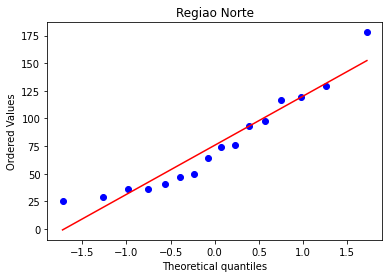

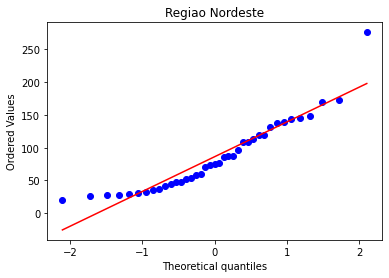

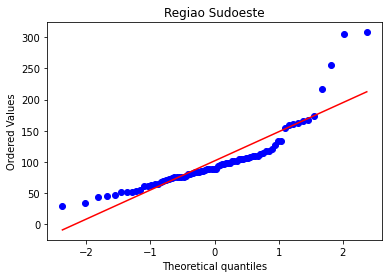

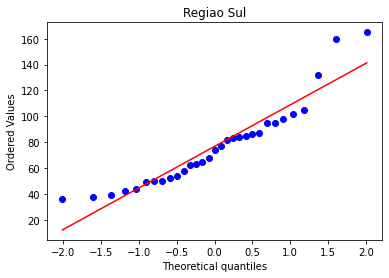

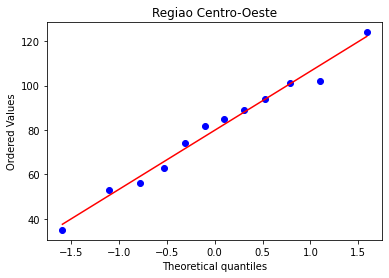

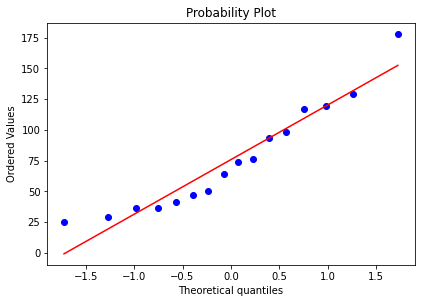

In [ ]:
print('Concluintes Escritos')
print('Norte:        '+normalidade(rNO['Concluintes Inscritos']))
print('Nordeste:     '+normalidade(rNE['Concluintes Inscritos']))
print('Sudeste:      '+normalidade(rSE['Concluintes Inscritos']))
print('Sul:          '+normalidade(rSU['Concluintes Inscritos']))
print('Centro-Oeste: '+normalidade(rCO['Concluintes Inscritos']))

print()

fig, ax = plt.subplots()
stats.probplot(rNO['Concluintes Inscritos'], fit=True,   plot=ax)
plt.title('Regiao Norte')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rNE['Concluintes Inscritos'], fit=True,   plot=ax)
plt.title('Regiao Nordeste')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rSE['Concluintes Inscritos'], fit=True,   plot=ax)
plt.title('Regiao Sudoeste')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rSU['Concluintes Inscritos'], fit=True,   plot=ax)
plt.title('Regiao Sul')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rCO['Concluintes Inscritos'], fit=True,   plot=ax)
plt.title('Regiao Centro-Oeste')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rNO['Concluintes Inscritos'], fit=True,   plot=ax)
#plt.show()

plt.gca().yaxis.set_minor_formatter(NullFormatter())
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,wspace=0.35)
plt.show()


Concluintes Participantes
Norte:        normalizados
Nordeste:     não normalizados
Sudeste:      não normalizados
Sul:          não normalizados
Centro-Oeste: normalizados



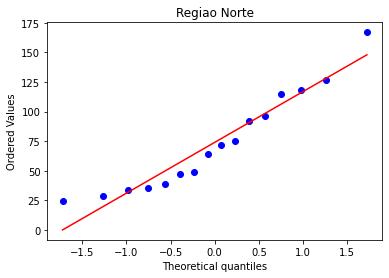

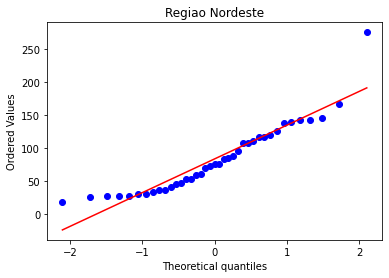

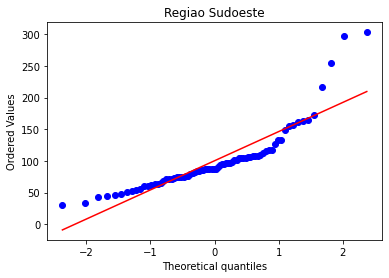

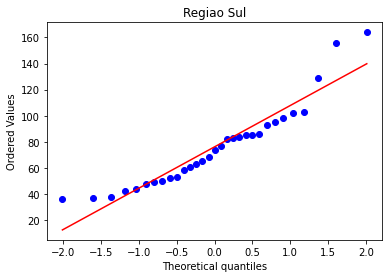

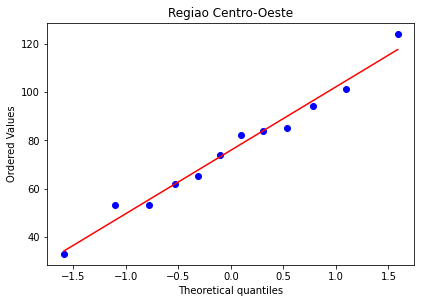

In [ ]:
print('Concluintes Participantes')
print('Norte:        '+normalidade(rNO['Concluintes Participantes']))
print('Nordeste:     '+normalidade(rNE['Concluintes Participantes']))
print('Sudeste:      '+normalidade(rSE['Concluintes Participantes']))
print('Sul:          '+normalidade(rSU['Concluintes Participantes']))
print('Centro-Oeste: '+normalidade(rCO['Concluintes Participantes']))
print()

fig, ax = plt.subplots()
stats.probplot(rNO['Concluintes Participantes'], fit=True,   plot=ax)
plt.title('Regiao Norte')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rNE['Concluintes Participantes'], fit=True,   plot=ax)
plt.title('Regiao Nordeste')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rSE['Concluintes Participantes'], fit=True,   plot=ax)
plt.title('Regiao Sudoeste')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rSU['Concluintes Participantes'], fit=True,   plot=ax)
plt.title('Regiao Sul')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rCO['Concluintes Participantes'], fit=True,   plot=ax)
plt.title('Regiao Centro-Oeste')
#plt.show()


plt.gca().yaxis.set_minor_formatter(NullFormatter())
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,wspace=0.35)
plt.show()

Variável Nota Padronizada - FG
Norte:        normalizados
Nordeste:     não normalizados
Sudeste:      normalizados
Sul:          normalizados
Centro-Oeste: normalizados



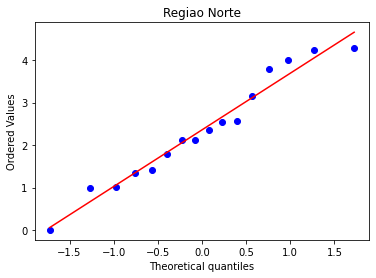

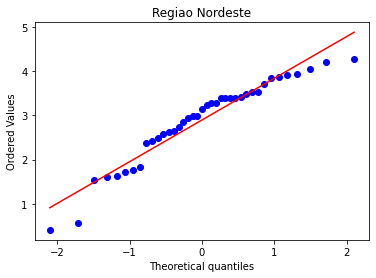

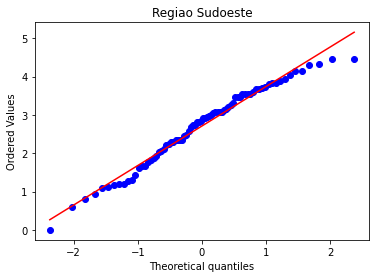

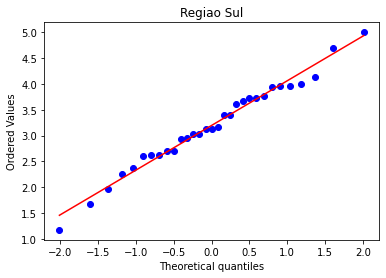

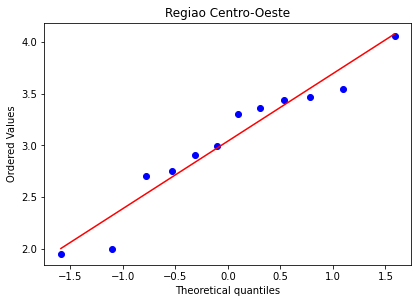

In [ ]:
print('Variável Nota Padronizada - FG')
print('Norte:        '+normalidade(rNO['Nota Padronizada - FG']))
print('Nordeste:     '+normalidade(rNE['Nota Padronizada - FG']))
print('Sudeste:      '+normalidade(rSE['Nota Padronizada - FG']))
print('Sul:          '+normalidade(rSU['Nota Padronizada - FG']))
print('Centro-Oeste: '+normalidade(rCO['Nota Padronizada - FG']))

print()

fig, ax = plt.subplots()
stats.probplot(rNO['Nota Padronizada - FG'], fit=True,   plot=ax)
plt.title('Regiao Norte')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rNE['Nota Padronizada - FG'], fit=True,   plot=ax)
plt.title('Regiao Nordeste')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rSE['Nota Padronizada - FG'], fit=True,   plot=ax)
plt.title('Regiao Sudoeste')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rSU['Nota Padronizada - FG'], fit=True,   plot=ax)
plt.title('Regiao Sul')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rCO['Nota Padronizada - FG'], fit=True,   plot=ax)
plt.title('Regiao Centro-Oeste')
#plt.show()


plt.gca().yaxis.set_minor_formatter(NullFormatter())
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,wspace=0.35)
plt.show()

Variável Nota Padronizada - CE
Norte:        normalizados
Nordeste:     normalizados
Sudeste:      não normalizados
Sul:          normalizados
Centro-Oeste: normalizados



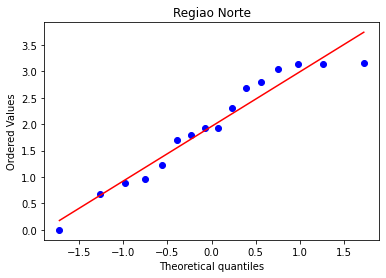

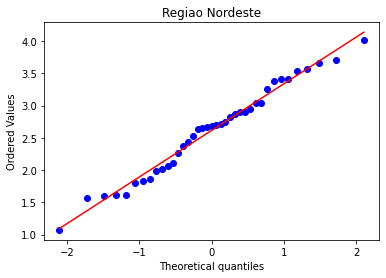

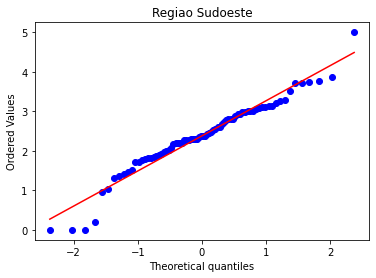

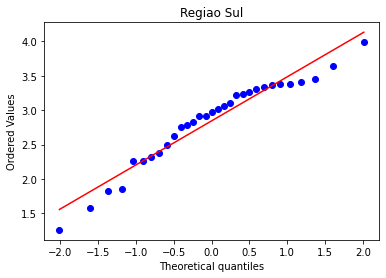

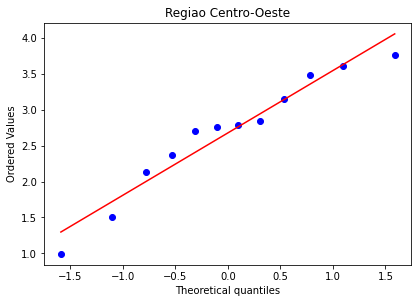

In [ ]:
print('Variável Nota Padronizada - CE')
print('Norte:        '+normalidade(rNO['Nota Padronizada - CE']))
print('Nordeste:     '+normalidade(rNE['Nota Padronizada - CE']))
print('Sudeste:      '+normalidade(rSE['Nota Padronizada - CE']))
print('Sul:          '+normalidade(rSU['Nota Padronizada - CE']))
print('Centro-Oeste: '+normalidade(rCO['Nota Padronizada - CE']))

print()

fig, ax = plt.subplots()
stats.probplot(rNO['Nota Padronizada - CE'], fit=True,   plot=ax)
plt.title('Regiao Norte')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rNE['Nota Padronizada - CE'], fit=True,   plot=ax)
plt.title('Regiao Nordeste')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rSE['Nota Padronizada - CE'], fit=True,   plot=ax)
plt.title('Regiao Sudoeste')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rSU['Nota Padronizada - CE'], fit=True,   plot=ax)
plt.title('Regiao Sul')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rCO['Nota Padronizada - CE'], fit=True,   plot=ax)
plt.title('Regiao Centro-Oeste')
#plt.show()


plt.gca().yaxis.set_minor_formatter(NullFormatter())
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,wspace=0.35)
plt.show()

Variável Conceito Enade (Contínuo)
Norte:        normalizados
Nordeste:     normalizados
Sudeste:      normalizados
Sul:          normalizados
Centro-Oeste: normalizados



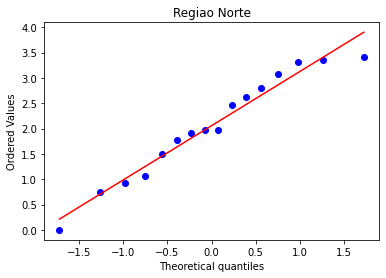

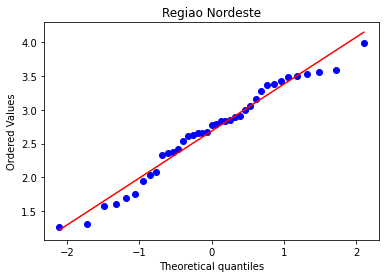

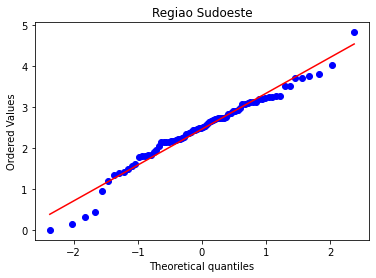

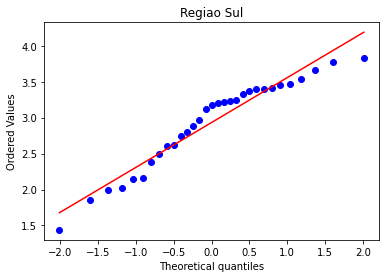

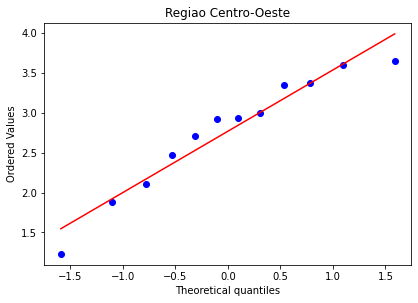

In [ ]:
print('Variável Conceito Enade (Contínuo)')
print('Norte:        '+normalidade(rNO['Conceito Enade (Contínuo)']))
print('Nordeste:     '+normalidade(rNE['Conceito Enade (Contínuo)']))
print('Sudeste:      '+normalidade(rSE['Conceito Enade (Contínuo)']))
print('Sul:          '+normalidade(rSU['Conceito Enade (Contínuo)']))
print('Centro-Oeste: '+normalidade(rCO['Conceito Enade (Contínuo)']))

print()

fig, ax = plt.subplots()
stats.probplot(rNO['Conceito Enade (Contínuo)'], fit=True,   plot=ax)
plt.title('Regiao Norte')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rNE['Conceito Enade (Contínuo)'], fit=True,   plot=ax)
plt.title('Regiao Nordeste')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rSE['Conceito Enade (Contínuo)'], fit=True,   plot=ax)
plt.title('Regiao Sudoeste')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rSU['Conceito Enade (Contínuo)'], fit=True,   plot=ax)
plt.title('Regiao Sul')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rCO['Conceito Enade (Contínuo)'], fit=True,   plot=ax)
plt.title('Regiao Centro-Oeste')
#plt.show()


plt.gca().yaxis.set_minor_formatter(NullFormatter())
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,wspace=0.35)
plt.show()

Variável Conceito Enade (Faixa)
Norte:        não normalizados
Nordeste:     não normalizados
Sudeste:      não normalizados
Sul:          não normalizados
Centro-Oeste: não normalizados



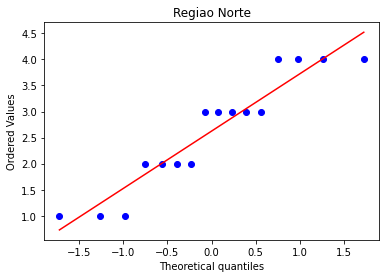

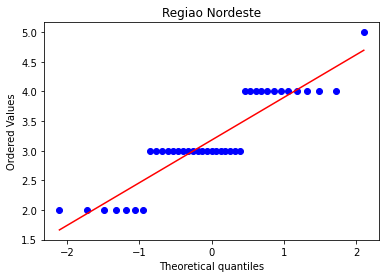

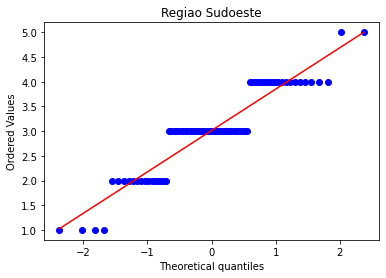

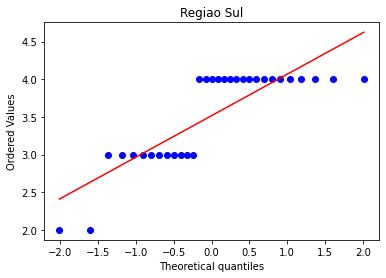

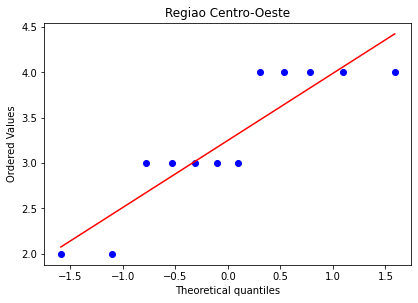

In [ ]:
print('Variável Conceito Enade (Faixa)')
print('Norte:        '+normalidade(rNO['Conceito Enade (Faixa)']))
print('Nordeste:     '+normalidade(rNE['Conceito Enade (Faixa)']))
print('Sudeste:      '+normalidade(rSE['Conceito Enade (Faixa)']))
print('Sul:          '+normalidade(rSU['Conceito Enade (Faixa)']))
print('Centro-Oeste: '+normalidade(rCO['Conceito Enade (Faixa)']))

print()

fig, ax = plt.subplots()
stats.probplot(rNO['Conceito Enade (Faixa)'], fit=True,   plot=ax)
plt.title('Regiao Norte')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rNE['Conceito Enade (Faixa)'], fit=True,   plot=ax)
plt.title('Regiao Nordeste')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rSE['Conceito Enade (Faixa)'], fit=True,   plot=ax)
plt.title('Regiao Sudoeste')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rSU['Conceito Enade (Faixa)'], fit=True,   plot=ax)
plt.title('Regiao Sul')
#plt.show()

fig, ax = plt.subplots()
stats.probplot(rCO['Conceito Enade (Faixa)'], fit=True,   plot=ax)
plt.title('Regiao Centro-Oeste')
#plt.show()


plt.gca().yaxis.set_minor_formatter(NullFormatter())
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,wspace=0.35)
plt.show()

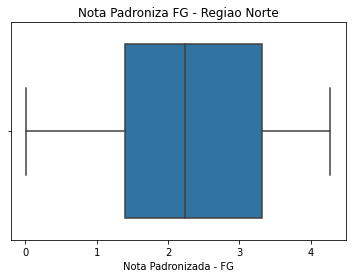

In [ ]:
ax = se.boxplot(x = 'Nota Padronizada - FG', data = rNO).set_title('Nota Padroniza FG - Regiao Norte')

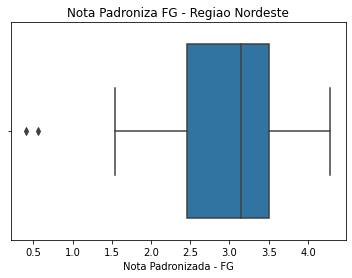

In [ ]:
ax = se.boxplot(x = 'Nota Padronizada - FG', data = rNE).set_title('Nota Padroniza FG - Regiao Nordeste')

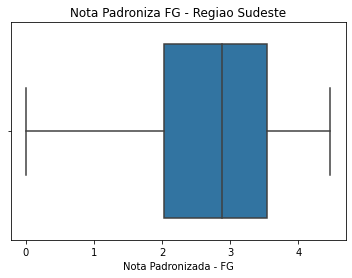

In [ ]:
ax = se.boxplot(x = 'Nota Padronizada - FG', data = rSE).set_title('Nota Padroniza FG - Regiao Sudeste')

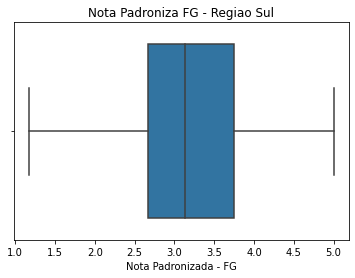

In [ ]:
ax = se.boxplot(x = 'Nota Padronizada - FG', data = rSU).set_title('Nota Padroniza FG - Regiao Sul')

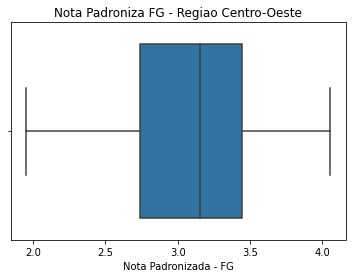

In [ ]:
ax = se.boxplot(x = 'Nota Padronizada - FG', data = rCO).set_title('Nota Padroniza FG - Regiao Centro-Oeste')

#**ITEM D**

In [ ]:
dfMedicina["Conceito Enade (Faixa)"] = pd.to_numeric(dfMedicina['Conceito Enade (Faixa)'], errors='coerce')

In [ ]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    tam_amostra = (t.ppf(0.025,n-1)**2)*(st.stdev(data)**2)/(0.01**2)
    return 'Coluna[{}]: Média {}, I.C.[{}, {}], e número de amostras (c/ erro máximo de 10%) {}'.format(titulos[Coluna], round(m,4), round(m-h,4), round(m+h,4), round(tam_amostra,4))

In [ ]:
titulos = list(dfMedicina.columns.values)
i = 0
while i < len(titulos):
    print( "[%d] = %s"%(i, titulos[i]) )
    i+=1

[0] = index
[1] = Código da Área
[2] = Código da IES
[3] = Sigla da IES
[4] = Município do Curso
[5] = Sigla da UF
[6] = Concluintes Inscritos
[7] = Concluintes Participantes
[8] = Nota Padronizada - FG
[9] = Nota Padronizada - CE
[10] = Conceito Enade (Contínuo)
[11] = Conceito Enade (Faixa)
[12] = Regiao


In [ ]:
#@title Número da coluna desejada { output-height: 10, form-width: "99%" }
Coluna =  11#@param {type:"integer"}

SAIDA = mean_confidence_interval(dfMedicina.iloc[:,Coluna])
SAIDA

'Coluna[Conceito Enade (Faixa)]: Média 3.1193, I.C.[2.9928, 3.2458], e número de amostras (c/ erro máximo de 10%) 28155.0775'